In [76]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [77]:
maxEggsNum = 100
maxFloorsNum = 100

In [78]:
def minThrow (eggsNum,floorsNum):
    minThrows = [] 
    jumps = [] 

    for egg in range(eggsNum+1):
        minThrows.append([])
        jumps.append([])
        for floor in range (floorsNum+1):
            if (egg == 0) and (floor == 0):
                minThrows[egg].append(0)
            elif floor == 0:
                minThrows[egg].append(0)
            elif egg == 1:
                minThrows[egg].append(floor)
            elif egg ==0:
                minThrows[egg].append(floorsNum+1)
            else:
                minimum = floorsNum+1 
                minIndex=-1
                for currentFloor in range(1, floor+1):
                    sol = 1+max(minThrows[egg][floor-currentFloor], minThrows[egg-1][currentFloor-1])
                    if sol <= minimum:
                        minimum = sol
                        minIndex = currentFloor
                minThrows[egg].append(minimum)
                jumps[egg].append(minIndex)
    return minThrows


In [79]:
minThrows = minThrow(maxEggsNum, maxFloorsNum)

In [80]:
def throwsDependingOnEggsNum (to, floorsNum):
    eggs = range(1,to)
    minimumThrows = []
    for egg in eggs:
        minimumThrows.append(minThrows[egg][floorsNum])
    plt.plot(eggs, minimumThrows)

In [81]:
def throwsDependingOnFloorsNum (to, eggsNum):
    floors = range(1,to)
    minimumThrows = []
    for floor in floors:
        minimumThrows.append(minThrows[eggsNum][floor])
    plt.plot(floors, minimumThrows)

In [82]:
import matplotlib.pyplot as plt
import numpy as np
def threeDGraph (f, to):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')


    xs = []
    for i in range(f,to+1):
        for j in range(f,to+1):
            xs.append(i)
    ys = []
    for i in range(f,to+1):
        for j in range(f,to+1):
            ys.append(j)
    zs = []
    for egg in range(f,to+1):
        for floor in range(f,to+1):
            zs.append(minThrows[egg][floor])
    ax.scatter(xs, ys, zs)

    ax.set_xlabel('EGGS')
    ax.set_ylabel('FLOORS')
    ax.set_zlabel('MINIMUM THROWS')

    plt.show()

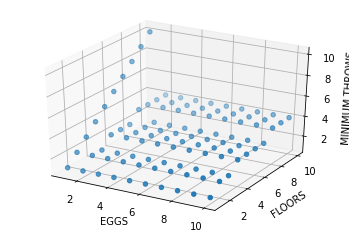

In [83]:
threeDGraph (1,10)

In [84]:
import math
def idealEggsNum(floorsNum):
    IDEAL_THROWS_NUM = (int)(math.log(2*floorsNum,2))
    for i in range(floorsNum+1):
        throwNum = minThrows[i][floorsNum]
        if throwNum == IDEAL_THROWS_NUM:
            return (i)

In [85]:
print (idealEggsNum(63))

6


In [91]:
def idealEggsNumDependingOnFloorsNum (to):
    floors = range(1,to+1)
    idealEggsN =[]
    for i in floors:
        idealEggsN.append(idealEggsNum(i))
    plt.plot(floors, idealEggsN)

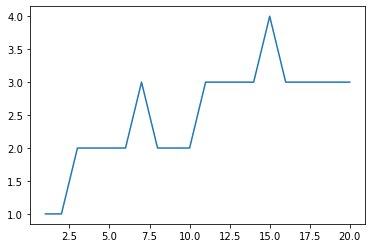

In [92]:
idealEggsNumDependingOnFloorsNum(20)